<a href="https://colab.research.google.com/github/AnthonyRom12/MNIST_Keras/blob/main/Mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning Techniques **
**RNN(Regular Neural Network)**

## Loading Data

<ipython-input-8-c01ad180dc9a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(value_count_training.keys()), y=list(value_count_training.values()), palette='cool')


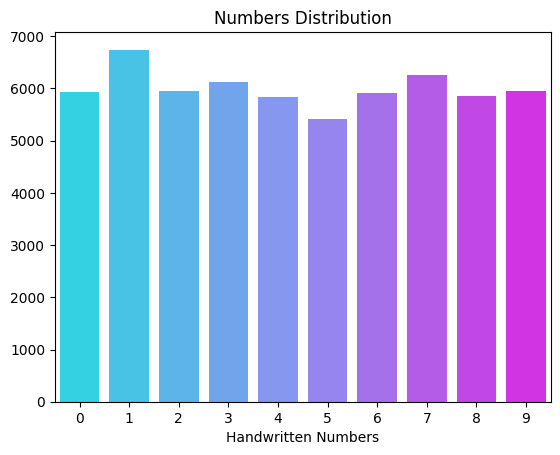

In [8]:
from keras.datasets import mnist

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

import seaborn as sns
import collections
import matplotlib.pyplot as plt

value_count_training = collections.Counter(training_dataset_y)

fig, ax0 = plt.subplots(1, 1, dpi=100)
ax = sns.barplot(x=list(value_count_training.keys()), y=list(value_count_training.values()), palette='cool')
ax.set_xlabel('Handwritten Numbers')
ax.set_title("Numbers Distribution")
plt.show()

training_dataset_x = training_dataset_x.reshape(-1, 28 * 28)
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

## One-Hot-Encoding


In [9]:
from keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

## Min-Mix Scaler

In [10]:
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

## Regular ANN Model

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=28 * 28, activation='relu', name='Hidden-1'))
model.add(Dense(256, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

## Training…

In [12]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 13s 16ms/step - loss: 0.2220 - accuracy: 0.9334 - val_loss: 0.1189 - val_accuracy: 0.9656
Epoch 2/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0864 - accuracy: 0.9731 - val_loss: 0.1024 - val_accuracy: 0.9678
Epoch 3/5
750/750 [==============================] - 8s 10ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0797 - val_accuracy: 0.9764
Epoch 4/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.1023 - val_accuracy: 0.9719
Epoch 5/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0309 - accuracy: 0.9897 - val_loss: 0.0875 - val_accuracy: 0.9763
CPU times: user 1min, sys: 3.26 s, total: 1min 3s
Wall time: 1min 23s


## Evaluation…

In [13]:
loss, accuracy  = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9771
loss = 0.0777522474527359, accuracy = 0.9771000146865845


## Visualization Model…

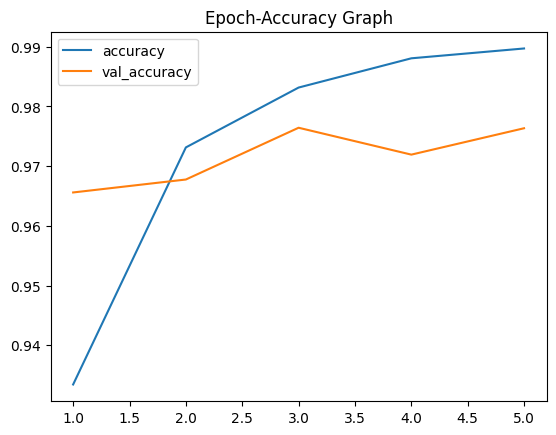

In [14]:
import matplotlib.pyplot as plt

plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()